<a href="https://colab.research.google.com/github/MohithS04/MohithS04/blob/main/DMT_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
true_data = pd.read_csv("/content/True.csv")
fake_data = pd.read_csv("/content/Fake.csv")
fake_data = fake_data.loc[:, ~fake_data.columns.str.contains('^Unnamed')]
true_data = true_data.loc[:, ~true_data.columns.str.contains('^Unnamed')]
true_data.to_csv('True.csv', index=False)
fake_data.to_csv('Fake.csv', index=False)

In [5]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
true_data.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [7]:
true_data.shape

(21417, 4)

In [8]:
true_data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [9]:
true_data.duplicated().sum()

206

In [10]:
true_data = true_data.drop_duplicates()

In [11]:
true_data.isna().sum()

,0
title,0
text,0
subject,0
date,0


In [12]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21211 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21211 non-null  object
 1   text     21211 non-null  object
 2   subject  21211 non-null  object
 3   date     21211 non-null  object
dtypes: object(4)
memory usage: 828.6+ KB


In [13]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17


In [14]:
fake_data.tail()

,title,text,subject,date
23518,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,16-Jan-16
23519,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,16-Jan-16
23520,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,15-Jan-16
23521,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,14-Jan-16
23522,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,12-Jan-16


In [15]:
fake_data.shape

(23523, 4)

In [16]:
fake_data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [17]:
fake_data.duplicated().sum()

43

In [18]:
fake_data = fake_data.drop_duplicates()

In [19]:
fake_data.isna().sum()

,0
title,1
text,1
subject,12
date,12


In [20]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23480 entries, 0 to 23522
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23479 non-null  object
 1   text     23479 non-null  object
 2   subject  23468 non-null  object
 3   date     23468 non-null  object
dtypes: object(4)
memory usage: 917.2+ KB


In [21]:
true_data['label'] = 1
fake_data['label'] = 0

In [22]:
data = pd.concat([true_data, fake_data])

In [23]:
data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23518,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,16-Jan-16,0
23519,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,16-Jan-16,0
23520,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,15-Jan-16,0
23521,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,14-Jan-16,0


In [24]:
data = data.sample(frac = 1).reset_index(drop=True)

In [25]:
data

,title,text,subject,date,label
0,Trump trails Clinton by 8 points after tape sc...,NEW YORK (Reuters) - Donald Trump has fallen f...,politicsNews,"October 11, 2016",1
1,Senior Republican lawmaker wants more sanction...,WASHINGTON (Reuters) - A senior U.S. Republica...,politicsNews,"July 7, 2017",1
2,Iran says resignation of Lebanese PM will crea...,BEIRUT (Reuters) - Iran said on Saturday that ...,worldnews,"November 4, 2017",1
3,BREAKING: DNC HACKER FIRED For Bank Fraud…Blam...,Apparently breaking the law and scamming the g...,politics,26-Jul-17,0
4,Turkey will deal with Iraqi central government...,ANKARA (Reuters) - Turkey is determined to con...,worldnews,"September 28, 2017",1
...,...,...,...,...,...
44686,GREAT NEWS! House GOP Moderates Threaten “You ...,It looks like there is more than one good reas...,politics,21-Oct-15,0
44687,Catalan leader says not enough guarantees from...,MADRID (Reuters) - Catalan leader Carles Puigd...,worldnews,"October 26, 2017",1
44688,Putin and Trump to Potentially Meet in Slovenia,"21st Century Wire says The Russian President, ...",Middle-east,10-Feb-17,0
44689,SELF-ADMITTED SEXUAL PREDATOR Who Supported Wi...,The hypocrisy of these liberal entertainers ...,politics,20-Nov-16,0


In [27]:
data['label'].unique()

array([1, 0])

In [28]:
data['label'].value_counts()

,count
label,
0,23480
1,21211


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

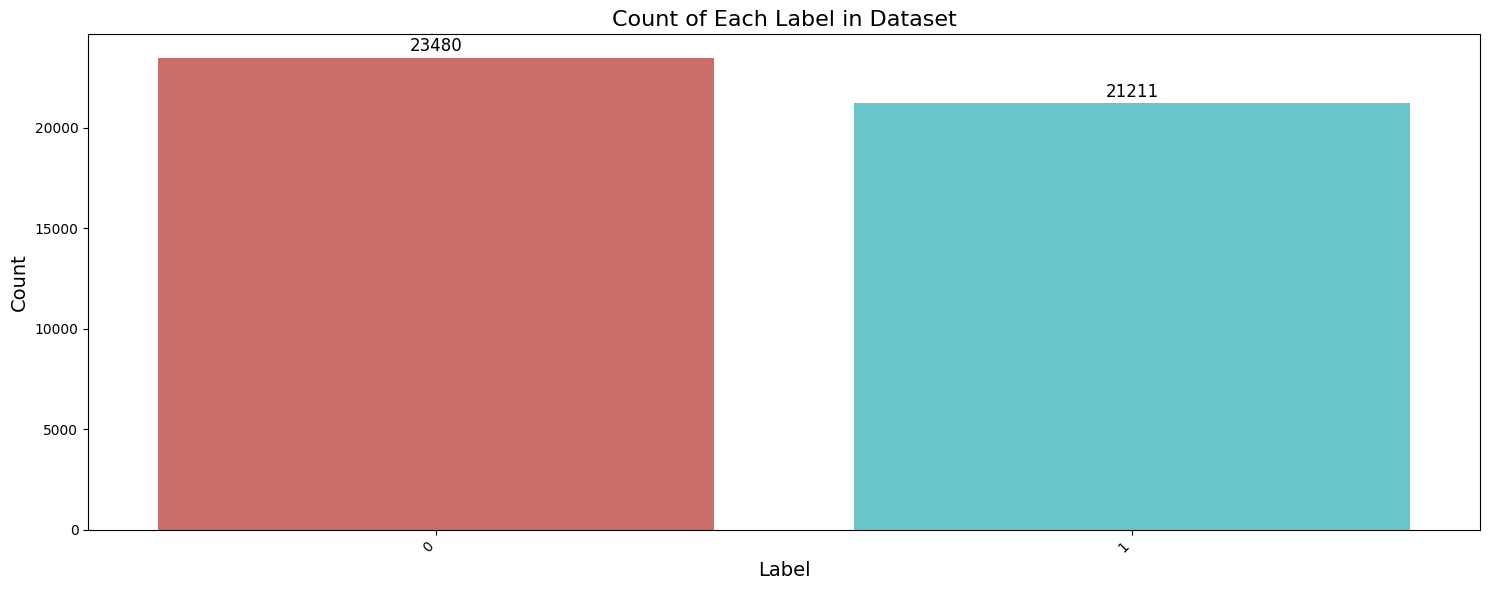

In [198]:
plt.figure(figsize=(15, 6))

# Assigning `x` to `hue` to fix the warning and disabling the legend
sns.countplot(
    x='label',
    data=data,
    hue='label',  # Assigning the x variable to `hue`
    dodge=False,  # Ensures bars are not split by `hue`
    palette='hls',
    legend=False  # Disabling legend as it's not needed
)

# Adding title and labels
plt.title("Count of Each Label in Dataset", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotating x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotating counts on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.tight_layout()
plt.show()


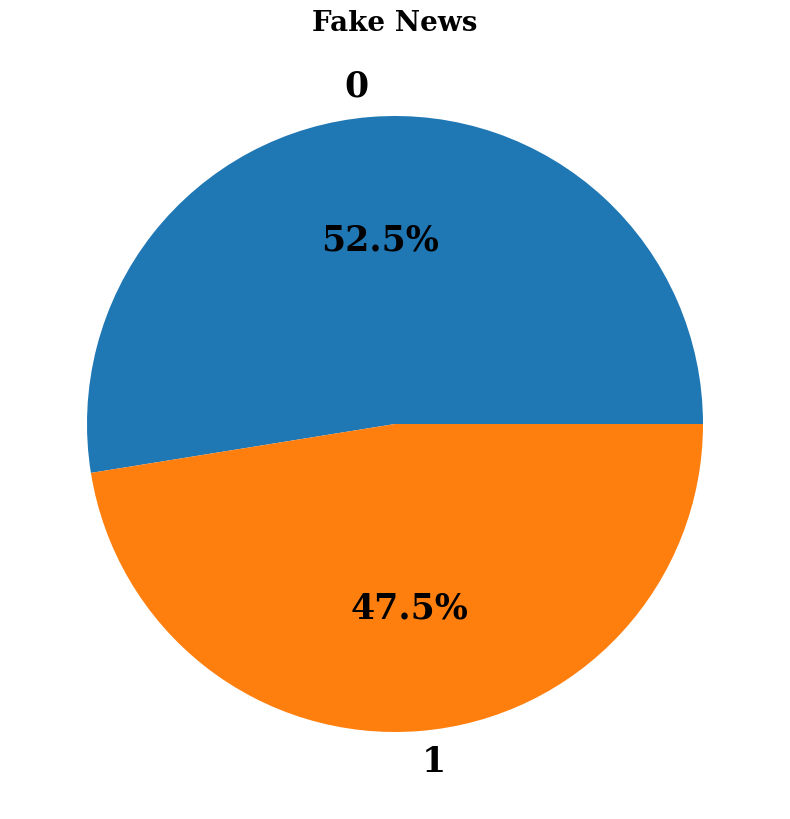

In [31]:
plt.figure(figsize=(20,10))
plt.pie(data['label'].value_counts(), labels=data['label'].value_counts().index,
        autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                       'color': 'black',
                                        'weight': 'bold',
                                        'family': 'serif' })
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Fake News', size=20, **hfont)
plt.show()

In [32]:
data['subject'].unique()

array(['politicsNews', 'worldnews', 'politics', 'left-news',
       'Government News', 'News', 'US_News', 'Middle-east',
       ' of which Soros is a major financier.Mercy Corps: Vis a vis the Arab-Israeli conflict',
       nan,
       ' state systems with outsized pretensions to power have reacted to their environments in two ways. The first strategy',
       ' fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014',
       ' Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"',
       ' the defense industry', ' high taxes',
       ' Karl Marx is either a villain or a hero of social engineering',
       ' claimed that hundreds of alternative media websites were producing  fake news  and  conspira

In [33]:
data['subject'].value_counts()

,count
subject,
politicsNews,11220
worldnews,9991
News,9050
politics,6835
left-news,4457
Government News,1570
US_News,775
Middle-east,770
high taxes,1


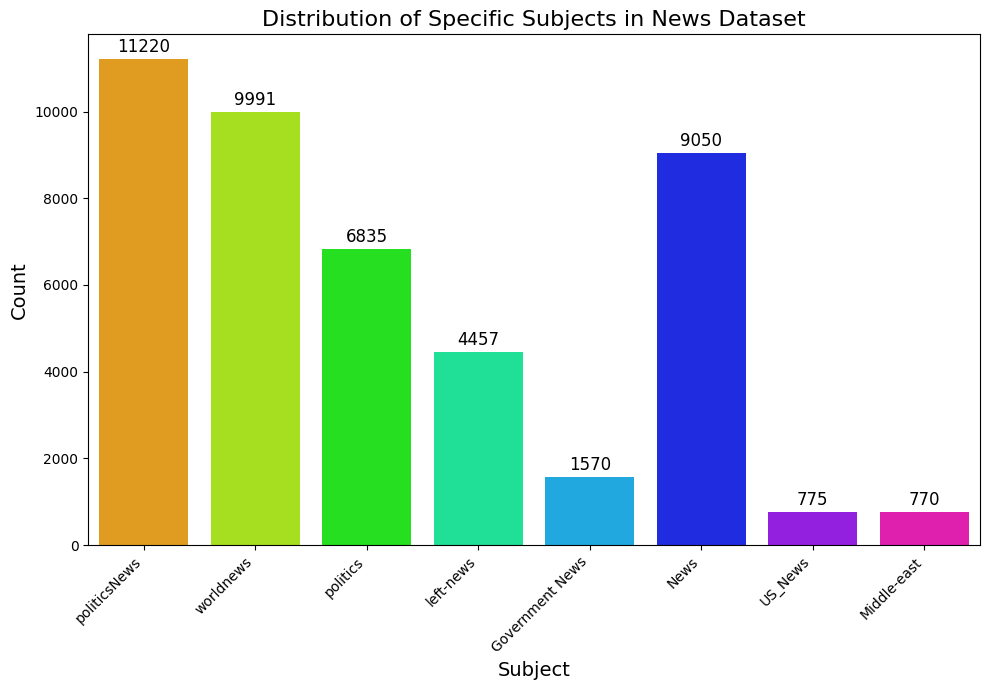

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data = data[data['subject'].isin(['US_News', 'left-news', 'News', 'politicsNews', 'worldnews', 'Government News', 'politics', 'Middle-east'])]

plt.figure(figsize=(10, 7))

# Creating the countplot for 'subject' with hue and disabling the legend
sns.countplot(
    x='subject',
    data=filtered_data,
    hue='subject',  # Assigning `subject` to `hue`
    dodge=False,    # Ensures bars are not split by hue
    palette=sns.color_palette("hsv", n_colors=len(filtered_data['subject'].unique())),
    legend=False    # Disabling legend as we don't need it here
)

# Adding title and labels for clarity
plt.title("Distribution of Specific Subjects in News Dataset", fontsize=16)
plt.xlabel("Subject", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotating x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Annotating bars with counts for accuracy
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Display the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


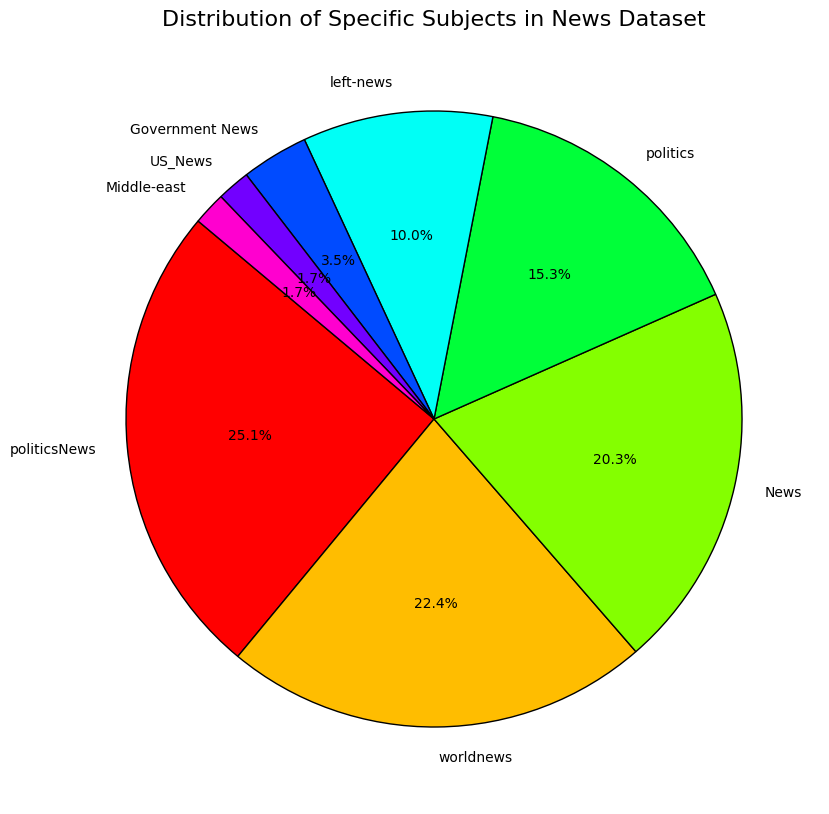

In [192]:
# Filtering and preparing data for the pie chart
subject_counts = filtered_data['subject'].value_counts()

# Creating the pie chart
plt.figure(figsize=(20, 10))
colors = plt.cm.hsv([i / len(subject_counts) for i in range(len(subject_counts))])

plt.pie(
    subject_counts,
    labels=subject_counts.index,
    autopct='%1.1f%%',  # Display percentages
    startangle=140,  # Rotate the start angle
    colors=colors,  # Assigning colors
    wedgeprops={'edgecolor': 'black'}  # Adding edge color for clarity
)

# Adding title
plt.title("Distribution of Specific Subjects in News Dataset", fontsize=16)

# Displaying the pie chart
plt.show()


In [36]:
data['news'] = data['title'] + ' ' + data['text']

In [37]:
data

,title,text,subject,date,label,news
0,Trump trails Clinton by 8 points after tape sc...,NEW YORK (Reuters) - Donald Trump has fallen f...,politicsNews,"October 11, 2016",1,Trump trails Clinton by 8 points after tape sc...
1,Senior Republican lawmaker wants more sanction...,WASHINGTON (Reuters) - A senior U.S. Republica...,politicsNews,"July 7, 2017",1,Senior Republican lawmaker wants more sanction...
2,Iran says resignation of Lebanese PM will crea...,BEIRUT (Reuters) - Iran said on Saturday that ...,worldnews,"November 4, 2017",1,Iran says resignation of Lebanese PM will crea...
3,BREAKING: DNC HACKER FIRED For Bank Fraud…Blam...,Apparently breaking the law and scamming the g...,politics,26-Jul-17,0,BREAKING: DNC HACKER FIRED For Bank Fraud…Blam...
4,Turkey will deal with Iraqi central government...,ANKARA (Reuters) - Turkey is determined to con...,worldnews,"September 28, 2017",1,Turkey will deal with Iraqi central government...
...,...,...,...,...,...,...
44686,GREAT NEWS! House GOP Moderates Threaten “You ...,It looks like there is more than one good reas...,politics,21-Oct-15,0,GREAT NEWS! House GOP Moderates Threaten “You ...
44687,Catalan leader says not enough guarantees from...,MADRID (Reuters) - Catalan leader Carles Puigd...,worldnews,"October 26, 2017",1,Catalan leader says not enough guarantees from...
44688,Putin and Trump to Potentially Meet in Slovenia,"21st Century Wire says The Russian President, ...",Middle-east,10-Feb-17,0,Putin and Trump to Potentially Meet in Sloveni...
44689,SELF-ADMITTED SEXUAL PREDATOR Who Supported Wi...,The hypocrisy of these liberal entertainers ...,politics,20-Nov-16,0,SELF-ADMITTED SEXUAL PREDATOR Who Supported Wi...


In [38]:
data['news']

,news
0,Trump trails Clinton by 8 points after tape sc...
1,Senior Republican lawmaker wants more sanction...
2,Iran says resignation of Lebanese PM will crea...
3,BREAKING: DNC HACKER FIRED For Bank Fraud…Blam...
4,Turkey will deal with Iraqi central government...
...,...
44686,GREAT NEWS! House GOP Moderates Threaten “You ...
44687,Catalan leader says not enough guarantees from...
44688,Putin and Trump to Potentially Meet in Sloveni...
44689,SELF-ADMITTED SEXUAL PREDATOR Who Supported Wi...


In [95]:
data_new = data.copy()

In [96]:
def clean_text(text):
    text = text.lower()
    return text.strip()

In [99]:
def clean_text(text):
    # Check if the text is a string before applying lower()
    if isinstance(text, str):
        text = text.lower()
        return text.strip()
    else:
        # Handle non-string values, e.g., return an empty string or the original value
        return ''  # or return text

data_new['news'] = data_new['news'].apply(lambda x: clean_text(x))

In [100]:
data_new['news']

,news
0,trump trails clinton by 8 points after tape sc...
1,senior republican lawmaker wants more sanction...
2,iran says resignation of lebanese pm will crea...
3,breaking: dnc hacker fired for bank fraud…blam...
4,turkey will deal with iraqi central government...
...,...
44686,great news! house gop moderates threaten “you ...
44687,catalan leader says not enough guarantees from...
44688,putin and trump to potentially meet in sloveni...
44689,self-admitted sexual predator who supported wi...


In [101]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [102]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [103]:
data_new['news']= data_new['news'].apply(lambda x:remove_punctuation(x))

In [104]:
data_new['news']

,news
0,trump trails clinton by 8 points after tape sc...
1,senior republican lawmaker wants more sanction...
2,iran says resignation of lebanese pm will crea...
3,breaking dnc hacker fired for bank fraud…blame...
4,turkey will deal with iraqi central government...
...,...
44686,great news house gop moderates threaten “you m...
44687,catalan leader says not enough guarantees from...
44688,putin and trump to potentially meet in sloveni...
44689,selfadmitted sexual predator who supported wif...


In [105]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


In [106]:
data_new['news']= data_new['news'].apply(lambda x:remove_punctuation(x))

In [107]:
data_new['news']

,news
0,trump trails clinton by 8 points after tape sc...
1,senior republican lawmaker wants more sanction...
2,iran says resignation of lebanese pm will crea...
3,breaking dnc hacker fired for bank fraud…blame...
4,turkey will deal with iraqi central government...
...,...
44686,great news house gop moderates threaten “you m...
44687,catalan leader says not enough guarantees from...
44688,putin and trump to potentially meet in sloveni...
44689,selfadmitted sexual predator who supported wif...


In [108]:
import re
def remove_punctuation(text):
  return re.sub(r'[^\w\s]', '', text)

In [109]:
data_new['news']= data_new['news'].apply(lambda x:remove_punctuation(x))

In [110]:
data_new['news']

,news
0,trump trails clinton by 8 points after tape sc...
1,senior republican lawmaker wants more sanction...
2,iran says resignation of lebanese pm will crea...
3,breaking dnc hacker fired for bank fraudblames...
4,turkey will deal with iraqi central government...
...,...
44686,great news house gop moderates threaten you ma...
44687,catalan leader says not enough guarantees from...
44688,putin and trump to potentially meet in sloveni...
44689,selfadmitted sexual predator who supported wif...


In [111]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
stopwords = nltk.corpus.stopwords.words('english')

In [113]:
def remove_stopwords(text):
    output = " ".join(i for i in text.split() if i not in stopwords)
    return output

data_new['news'] = data_new['news'].apply(lambda x: remove_stopwords(x))

In [114]:
data_new['news']

,news
0,trump trails clinton 8 points tape scandal deb...
1,senior republican lawmaker wants sanctions rus...
2,iran says resignation lebanese pm create tensi...
3,breaking dnc hacker fired bank fraudblames isl...
4,turkey deal iraqi central government pms meet ...
...,...
44686,great news house gop moderates threaten may se...
44687,catalan leader says enough guarantees madrid c...
44688,putin trump potentially meet slovenia 21st cen...
44689,selfadmitted sexual predator supported wife en...


In [115]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_sentence(sentence):
    if isinstance(sentence, str):
        words = word_tokenize(sentence)
        stemmed_words = [stemmer.stem(word) for word in words]
        return ' '.join(stemmed_words)
    return sentence

data_new['news'] = data_new['news'].apply(lambda x: stem_sentence(x))

In [116]:
data_new['news']

,news
0,trump trail clinton 8 point tape scandal debat...
1,senior republican lawmak want sanction russia ...
2,iran say resign lebanes pm creat tension regio...
3,break dnc hacker fire bank fraudblam islamopho...
4,turkey deal iraqi central govern pm meet soon ...
...,...
44686,great news hous gop moder threaten may see mai...
44687,catalan leader say enough guarante madrid call...
44688,putin trump potenti meet slovenia 21st centuri...
44689,selfadmit sexual predat support wife enabl sex...


In [117]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip()
    text = re.sub('\S*\d\S*\s*','', text).strip()
    return text.strip()

In [118]:
data_new['news'] = data_new['news'].apply(lambda x: clean_text(x))

In [119]:
data_new['news']

,news
0,trump trail clinton point tape scandal debat r...
1,senior republican lawmak want sanction russia ...
2,iran say resign lebanes pm creat tension regio...
3,break dnc hacker fire bank fraudblam islamopho...
4,turkey deal iraqi central govern pm meet soon ...
...,...
44686,great news hous gop moder threaten may see mai...
44687,catalan leader say enough guarante madrid call...
44688,putin trump potenti meet slovenia centuri wire...
44689,selfadmit sexual predat support wife enabl sex...


In [120]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [121]:
data_new['news'] = data_new['news'].apply(lambda x: remove_urls(x))

In [122]:
data_new['news']

,news
0,trump trail clinton point tape scandal debat r...
1,senior republican lawmak want sanction russia ...
2,iran say resign lebanes pm creat tension regio...
3,break dnc hacker fire bank fraudblam islamopho...
4,turkey deal iraqi central govern pm meet soon ...
...,...
44686,great news hous gop moder threaten may see mai...
44687,catalan leader say enough guarante madrid call...
44688,putin trump potenti meet slovenia centuri wire...
44689,selfadmit sexual predat support wife enabl sex...


In [123]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [124]:
data_new['news'] = data_new['news'].apply(lambda x: remove_digits(x))

In [125]:
data_new['news']

,news
0,trump trail clinton point tape scandal debat r...
1,senior republican lawmak want sanction russia ...
2,iran say resign lebanes pm creat tension regio...
3,break dnc hacker fire bank fraudblam islamopho...
4,turkey deal iraqi central govern pm meet soon ...
...,...
44686,great news hous gop moder threaten may see mai...
44687,catalan leader say enough guarante madrid call...
44688,putin trump potenti meet slovenia centuri wire...
44689,selfadmit sexual predat support wife enabl sex...


In [126]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [127]:
data_new['news'] = data_new['news'].apply(lambda x: remove_emojis(x))

In [128]:
data_new['news']

,news
0,trump trail clinton point tape scandal debat r...
1,senior republican lawmak want sanction russia ...
2,iran say resign lebanes pm creat tension regio...
3,break dnc hacker fire bank fraudblam islamopho...
4,turkey deal iraqi central govern pm meet soon ...
...,...
44686,great news hous gop moder threaten may see mai...
44687,catalan leader say enough guarante madrid call...
44688,putin trump potenti meet slovenia centuri wire...
44689,selfadmit sexual predat support wife enabl sex...


In [129]:
data_new['news'] = data_new['news'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

In [130]:
data_new['news'] = data_new['news'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [131]:
data_new

,title,text,subject,date,label,news
0,Trump trails Clinton by 8 points after tape sc...,NEW YORK (Reuters) - Donald Trump has fallen f...,politicsNews,"October 11, 2016",1,trump trail clinton point tape scandal debat r...
1,Senior Republican lawmaker wants more sanction...,WASHINGTON (Reuters) - A senior U.S. Republica...,politicsNews,"July 7, 2017",1,senior republican lawmak want sanction russia ...
2,Iran says resignation of Lebanese PM will crea...,BEIRUT (Reuters) - Iran said on Saturday that ...,worldnews,"November 4, 2017",1,iran say resign lebanes pm creat tension regio...
3,BREAKING: DNC HACKER FIRED For Bank Fraud…Blam...,Apparently breaking the law and scamming the g...,politics,26-Jul-17,0,break dnc hacker fire bank fraudblam islamopho...
4,Turkey will deal with Iraqi central government...,ANKARA (Reuters) - Turkey is determined to con...,worldnews,"September 28, 2017",1,turkey deal iraqi central govern pm meet soon ...
...,...,...,...,...,...,...
44686,GREAT NEWS! House GOP Moderates Threaten “You ...,It looks like there is more than one good reas...,politics,21-Oct-15,0,great news hous gop moder threaten may see mai...
44687,Catalan leader says not enough guarantees from...,MADRID (Reuters) - Catalan leader Carles Puigd...,worldnews,"October 26, 2017",1,catalan leader say enough guarante madrid call...
44688,Putin and Trump to Potentially Meet in Slovenia,"21st Century Wire says The Russian President, ...",Middle-east,10-Feb-17,0,putin trump potenti meet slovenia centuri wire...
44689,SELF-ADMITTED SEXUAL PREDATOR Who Supported Wi...,The hypocrisy of these liberal entertainers ...,politics,20-Nov-16,0,selfadmit sexual predat support wife enabl sex...


In [132]:
data_new = data_new[['news', 'label']]

In [133]:
data_new

,news,label
0,trump trail clinton point tape scandal debat r...,1
1,senior republican lawmak want sanction russia ...,1
2,iran say resign lebanes pm creat tension regio...,1
3,break dnc hacker fire bank fraudblam islamopho...,0
4,turkey deal iraqi central govern pm meet soon ...,1
...,...,...
44686,great news hous gop moder threaten may see mai...,0
44687,catalan leader say enough guarante madrid call...,1
44688,putin trump potenti meet slovenia centuri wire...,0
44689,selfadmit sexual predat support wife enabl sex...,0


In [134]:
data_new.to_csv('cleaned_fake_news_data.csv')

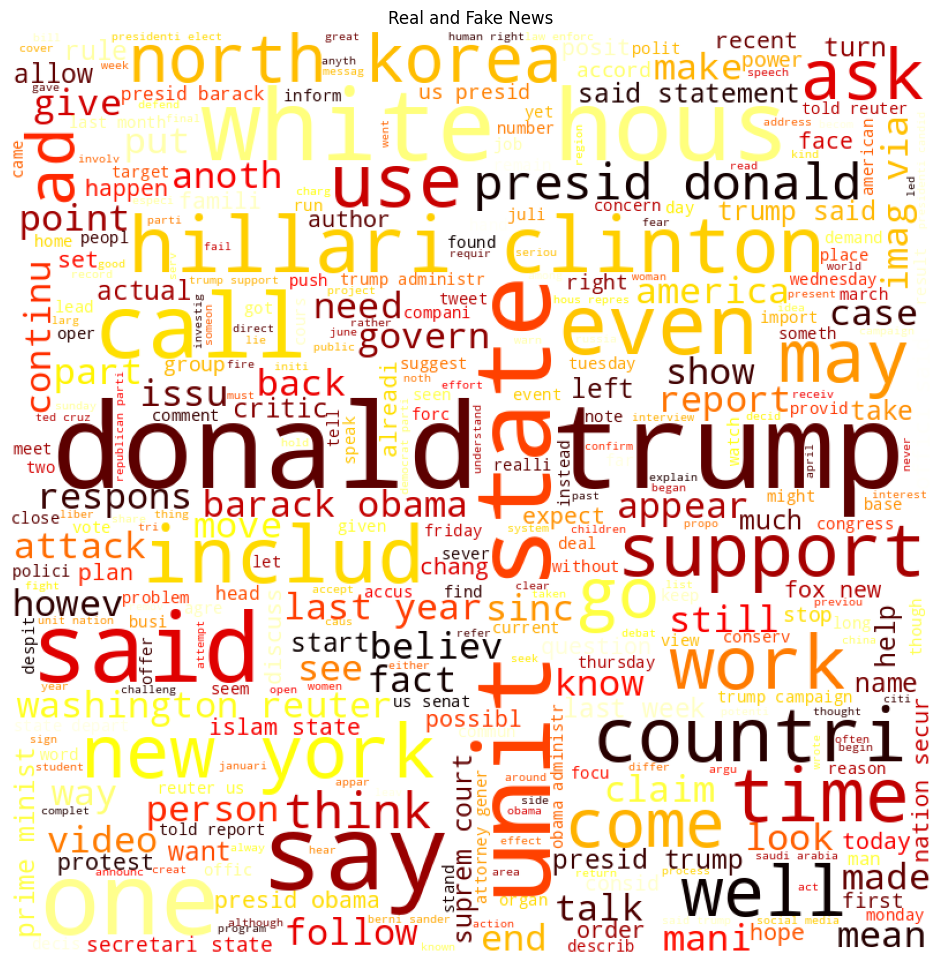

In [135]:
combined_title = ' '.join(data_new['news'])

wordcloud_img = WordCloud(width = 800, height = 800, max_words = 5000,
                            background_color ='white', colormap = 'hot_r',
                            min_font_size = 10).generate(combined_title)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_img)
plt.axis('off')
plt.title('Real and Fake News')
plt.tight_layout(pad=2)
plt.show()

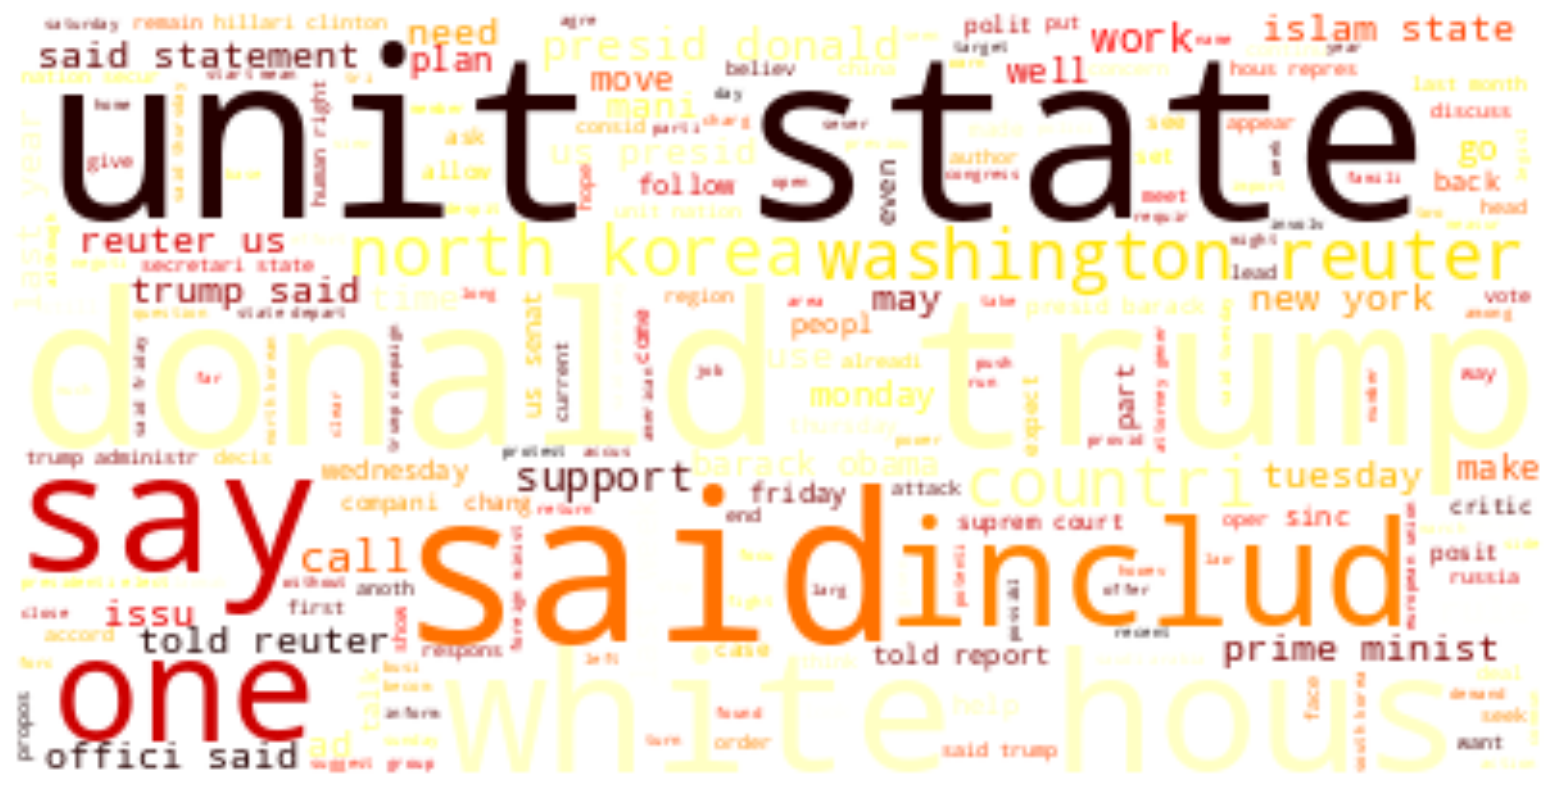

In [136]:
real_text_data = ' '.join(data_new[data_new['label'] == 1]['news'])

if real_text_data:
    wordcloud = WordCloud(background_color='white', max_words = 5000, colormap = 'hot_r').generate(real_text_data)

    fig, ax = plt.subplots(figsize=(30, 10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.show()
else:
    print('No real text data to generate a word cloud.')

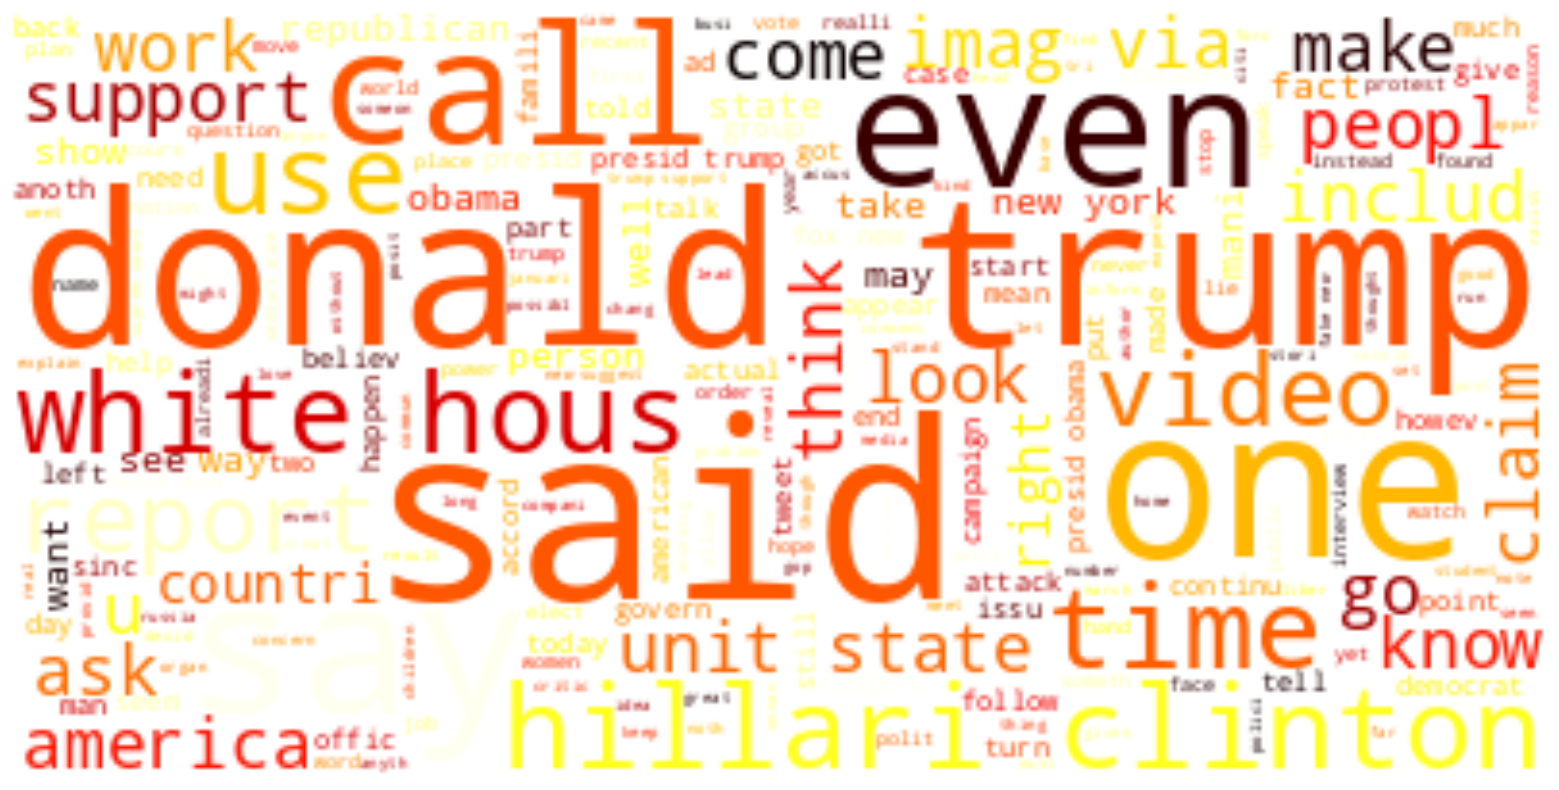

In [137]:
fake_text_data = ' '.join(data_new[data_new['label'] == 0]['news'])

if real_text_data:
    wordcloud = WordCloud(background_color='white', max_words = 5000, colormap = 'hot_r').generate(fake_text_data)

    fig, ax = plt.subplots(figsize=(30, 10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.show()
else:
    print('No fake text data to generate a word cloud.')

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import TfidfVectorizer


In [139]:
X = data_new['news']
y = data_new['label']

In [140]:
tfidf_vectorizer = TfidfVectorizer(max_features = 10000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [141]:
X_tfidf

<44691x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 6336575 stored elements in Compressed Sparse Row format>

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify = y,
                                                    random_state=42)

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
lr_classifier = LogisticRegression(random_state = 42)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [146]:
y_pred = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

Accuracy: 0.9875825036357534


In [147]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.9875919718175957
Recall: 0.9875825036357534
F1 Score: 0.9875836582209813


In [148]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [149]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.98      0.99      0.99      4243

    accuracy                           0.99      8939
   macro avg       0.99      0.99      0.99      8939
weighted avg       0.99      0.99      0.99      8939

Confusion Matrix:
 [[4632   64]
 [  47 4196]]


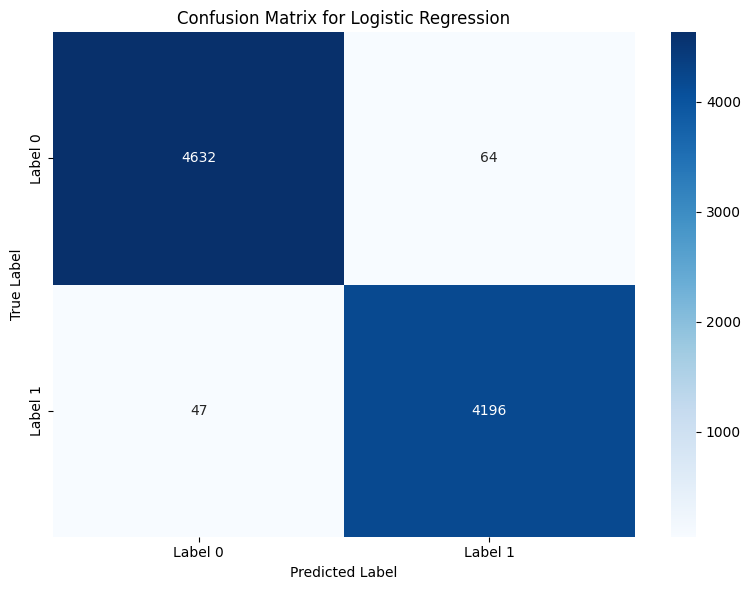

In [150]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Label 0', 'Label 1'],
            yticklabels=['Label 0', 'Label 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.tight_layout()
plt.show()

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [153]:
y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)

Accuracy: 0.9961964425550957


In [154]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.99619666807597
Recall: 0.9961964425550957
F1 Score: 0.9961963553132399


In [155]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4243

    accuracy                           1.00      8939
   macro avg       1.00      1.00      1.00      8939
weighted avg       1.00      1.00      1.00      8939

Confusion Matrix:
 [[4681   15]
 [  19 4224]]


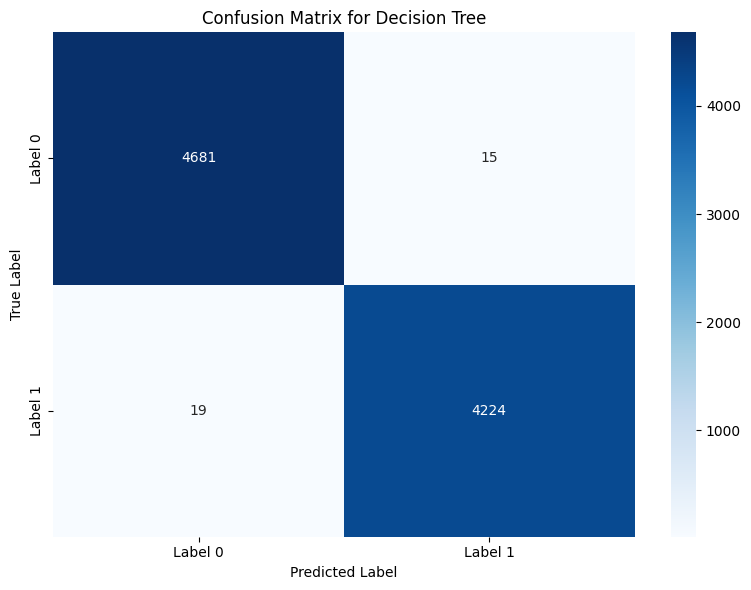

In [156]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Label 0', 'Label 1'],
            yticklabels=['Label 0', 'Label 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.tight_layout()
plt.show()

In [157]:
from sklearn.naive_bayes import MultinomialNB

In [158]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [160]:
y_pred = naive_bayes_classifier.predict(X_test)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.9344517396127774
Recall: 0.9344445687437074
F1 Score: 0.9344274599625361


In [161]:
nb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", nb_accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9344445687437074
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      4696
           1       0.94      0.93      0.93      4243

    accuracy                           0.93      8939
   macro avg       0.93      0.93      0.93      8939
weighted avg       0.93      0.93      0.93      8939

Confusion Matrix:
 [[4424  272]
 [ 314 3929]]


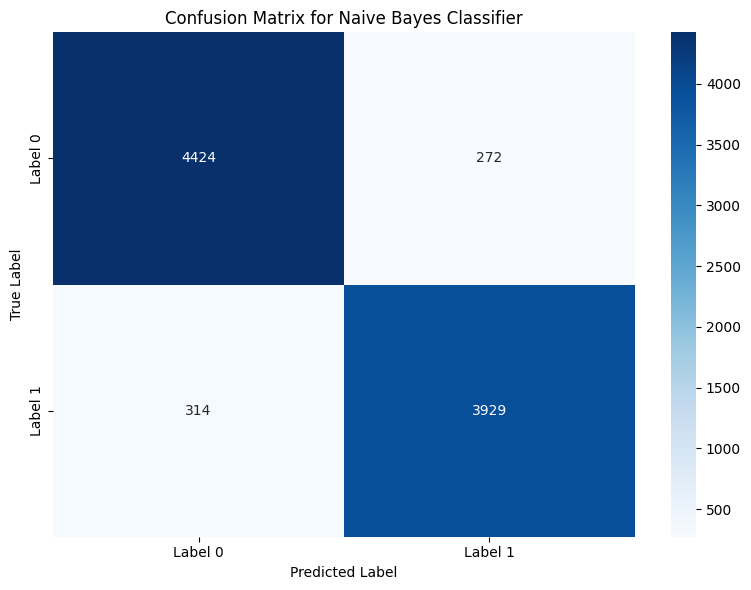

In [162]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Label 0', 'Label 1'],
            yticklabels=['Label 0', 'Label 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.tight_layout()
plt.show()


In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [165]:
y_pred = rf_classifier.predict(X_test)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.9833000671049689
Recall: 0.98310773017116
F1 Score: 0.9830969553754938


In [166]:
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.98310773017116
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      4696
           1       0.99      0.97      0.98      4243

    accuracy                           0.98      8939
   macro avg       0.98      0.98      0.98      8939
weighted avg       0.98      0.98      0.98      8939

Confusion Matrix:
 [[4667   29]
 [ 122 4121]]


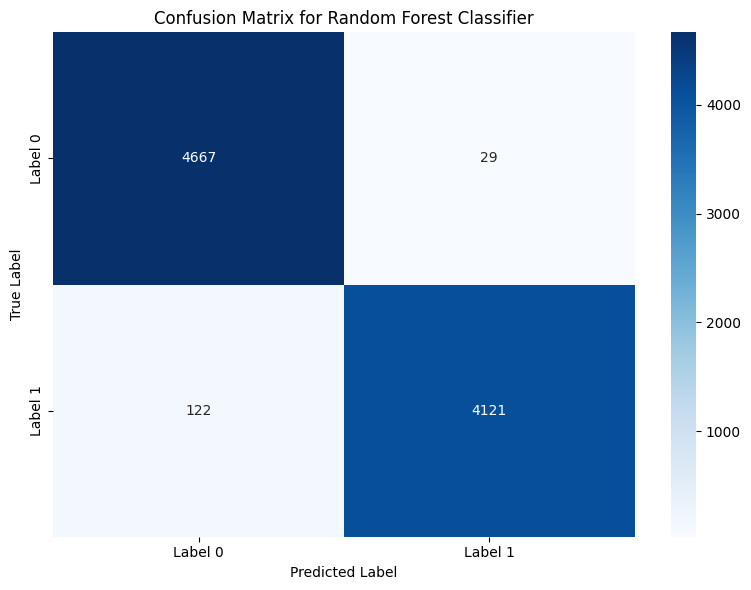

In [167]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Label 0', 'Label 1'],
            yticklabels=['Label 0', 'Label 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.tight_layout()
plt.show()

In [169]:
accuracies = {
    'Logistic Regression': lr_accuracy,
    'Decision Tree': dt_accuracy,
    'Multinomail Naive Bayes': nb_accuracy,
    'Random Forest': rf_accuracy
}

In [170]:
fig = go.Figure(
    data=[
        go.Bar(x=list(accuracies.keys()), y=list(accuracies.values()))
    ],
    layout={
        'title': 'Model Comparison: Accuracy',
        'xaxis': {'title': 'Models'},
        'yaxis': {'title': 'Accuracy'}
    }
)

for model, accuracy in accuracies.items():
    fig.add_annotation(
        x=model,
        y=accuracy,
        text=f'{accuracy:.2f}',
        showarrow=False,
        font=dict(size=10),
        xanchor='center',
        yanchor='bottom',
        yshift=-10
    )

fig.show()

In [171]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [173]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(data_new['news'])
sequences = tokenizer.texts_to_sequences(data_new['news'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [174]:
labels = np.array(data_new['label'])

In [175]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, stratify = labels, random_state=42)


In [176]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



In [177]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [178]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.9692 - loss: 0.0923 - val_accuracy: 0.9957 - val_loss: 0.0185
Epoch 2/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9985 - val_loss: 0.0067
Epoch 3/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9999 - loss: 3.6992e-04 - val_accuracy: 0.9983 - val_loss: 0.0091
Epoch 4/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 1.0000 - loss: 2.2652e-04 - val_accuracy: 0.9979 - val_loss: 0.0126
Epoch 5/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 1.0000 - loss: 1.5424e-05 - val_accuracy: 0.9980 - val_loss: 0.0140
Epoch 6/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 1.0000 - loss: 7.0907e-07 - val_accuracy: 0.9980 - val_loss: 0.0144
Epoch 7/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 1.0000 - loss: 4.6612e-07 - val_accuracy: 0.9980 - val_loss: 0.0148
Epoch 8/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 1.00

In [193]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [194]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 99.83%


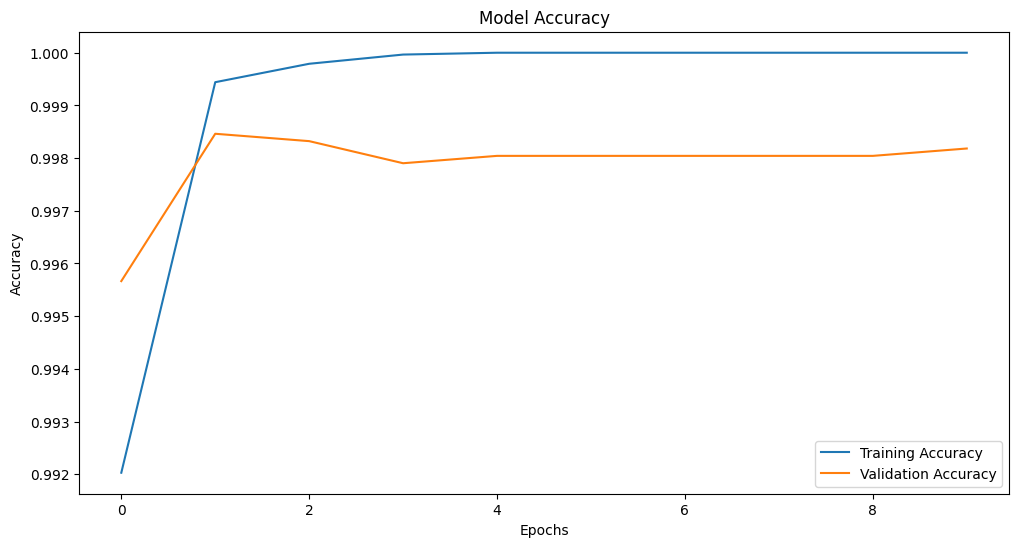

In [195]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

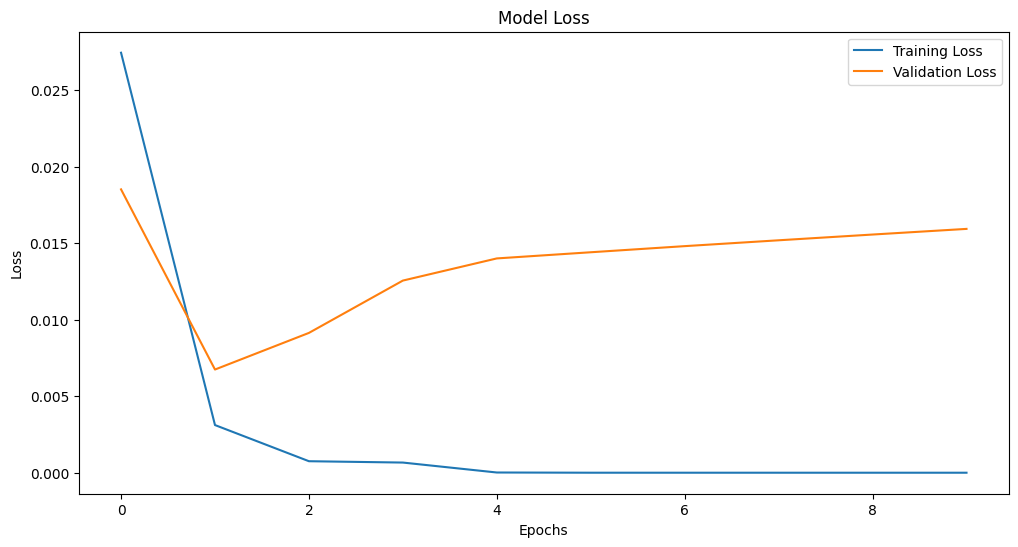

In [196]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()